# <center>Exploring Facial Recognition</center>

In this project we will use the scikit-learn Olivetti facial data set to explore image processing and facial recognition.  The data set is part of the scikit-learn package; more information is available here:

https://scikit-learn.org/stable/datasets/real_world.html#olivetti-faces-dataset

Credit for these images is thanks to AT&T Laboratories Cambridge, MA.

The data set consists of 10 different images of 40 subjects for a total of 400 images.

First let's import numpy and the scikit-learn modules:

In [1]:
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition
from sklearn.neural_network import MLPClassifier



We're going to load the face image data using the lines below. <br>
The scikit-learn module "datasets" contains several projects suitable for data science projects. We need to load the image data using the following import flags:<br> 
return_X_y=False <br>
shuffle=False <br>
random_state=0 <br>
The default for random_state=0 will be used, meaning no randomization of the data will be performed.  If we did want to randomize the data we would set random_state={some integer value}, this would set the random seed to a specific value for reproducability but still "randomize" the data.  If we were to randomize the data, then the value for shuffle also needs to be set to True, otherwise the defualt (False) would NOT to shuffle the data.
The data will be load as numpy arrays for the image data as well as the target information (subject number to identify the image face).  After we load the data we will inspect the data to see how it's structured.

In [2]:
#digits = datasets.load_digits()
faces = datasets.fetch_olivetti_faces(return_X_y=False, shuffle=False, random_state=0)
faces

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

We see that the image data is contained in numpy arrays and that the corresponding subject ID is in the 'targer' numpy array. We can learn more about the data set by printing the built-in DESCR function:

In [3]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

The facial data consists of 400 images of faces in 64X64 arrays.  Each facial image array has been flattened into a 4096 vector as we can see when we explore the shape of the array by selecting one of the images.

In [4]:
print("Array dimensions for the 12th image is ", faces.data[12].shape)
print(type(faces))

Array dimensions for the 12th image is  (4096,)
<class 'sklearn.utils.Bunch'>


We can view more information about the data, we will randomly choose image 12 and explore the structure of the data:

In [5]:
print("Image data mean: ", faces.data[12].mean())
print("Image data min: ", faces.data[12].min())
print("Image data max: ", faces.data[12].max())
faces.data[12]

Image data mean:  0.55886817
Image data min:  0.0661157
Image data max:  0.9834711


array([0.6570248 , 0.677686  , 0.6983471 , ..., 0.11570248, 0.11570248,
       0.10330579], dtype=float32)

We can see from the data above that the image for the 12th image has a mean of 0.5589, min of 0.0661, max of 0.9835.  The data has already been mapped to a range of 0 to 1. 
As stated above, the data for each image is in the form of a 64X64 numpy array.  We will use the matplotlib function imshow to plot the image.  First let's take a look at the raw data for a single image:

In [6]:
i=27
print(faces.data[i])
faces.data[i].shape

[0.17355372 0.16115703 0.16115703 ... 0.49173555 0.43801653 0.34710744]


(4096,)

We see the data for the "ith" image is a single long array and the shape of the image is a vector with 4096 data points.  The original data was in a 64X64 array that's been flattened to a 4096 long vector.  We can change the shape of a single vector back into the 64X64 bit array:

In [7]:
i=27
print(faces.data[i].reshape(64,64))
faces.data[i].reshape(64,64).shape

[[0.17355372 0.16115703 0.16115703 ... 0.54545456 0.55785125 0.55785125]
 [0.15289256 0.14876033 0.16528925 ... 0.55785125 0.5413223  0.553719  ]
 [0.1446281  0.1446281  0.14049587 ... 0.5495868  0.55785125 0.54545456]
 ...
 [0.28512397 0.3181818  0.2603306  ... 0.5082645  0.5123967  0.446281  ]
 [0.2768595  0.29752067 0.2644628  ... 0.5041322  0.4752066  0.41735536]
 [0.25619835 0.2520661  0.27272728 ... 0.49173555 0.43801653 0.34710744]]


(64, 64)

Now we have the image for the "ith" data set and we can input that into the plt.imshow function:

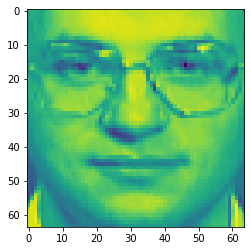

In [8]:
#plt.subplot(1,1,1)
i = 53
plt.imshow(faces.data[i].reshape(64,64))

The image is a little "green" when the defaul color map is used, but we can change that. We can try a wide variety of color maps. Here are a few examples:<br>
cmap=plt.cm.RdBu<br>
cmap='gray'<br>
cmap='gist_earth_r'<br>

However, most likely you will prefer the simple 'gray' color map.<br>
See: help(plt.imshow) for more information. <br><br>
We'll also make a function to show several images at one time.  Just adjust the istart number and adjust irow and icol to view different numbers of images.  Since there are 10 images for each subject, we will view 3 subjects at a time and see all 10 images of each subject.  We will start with isubject = 0 (first subject), just change the isubject value to view a different set of 3 individuals:

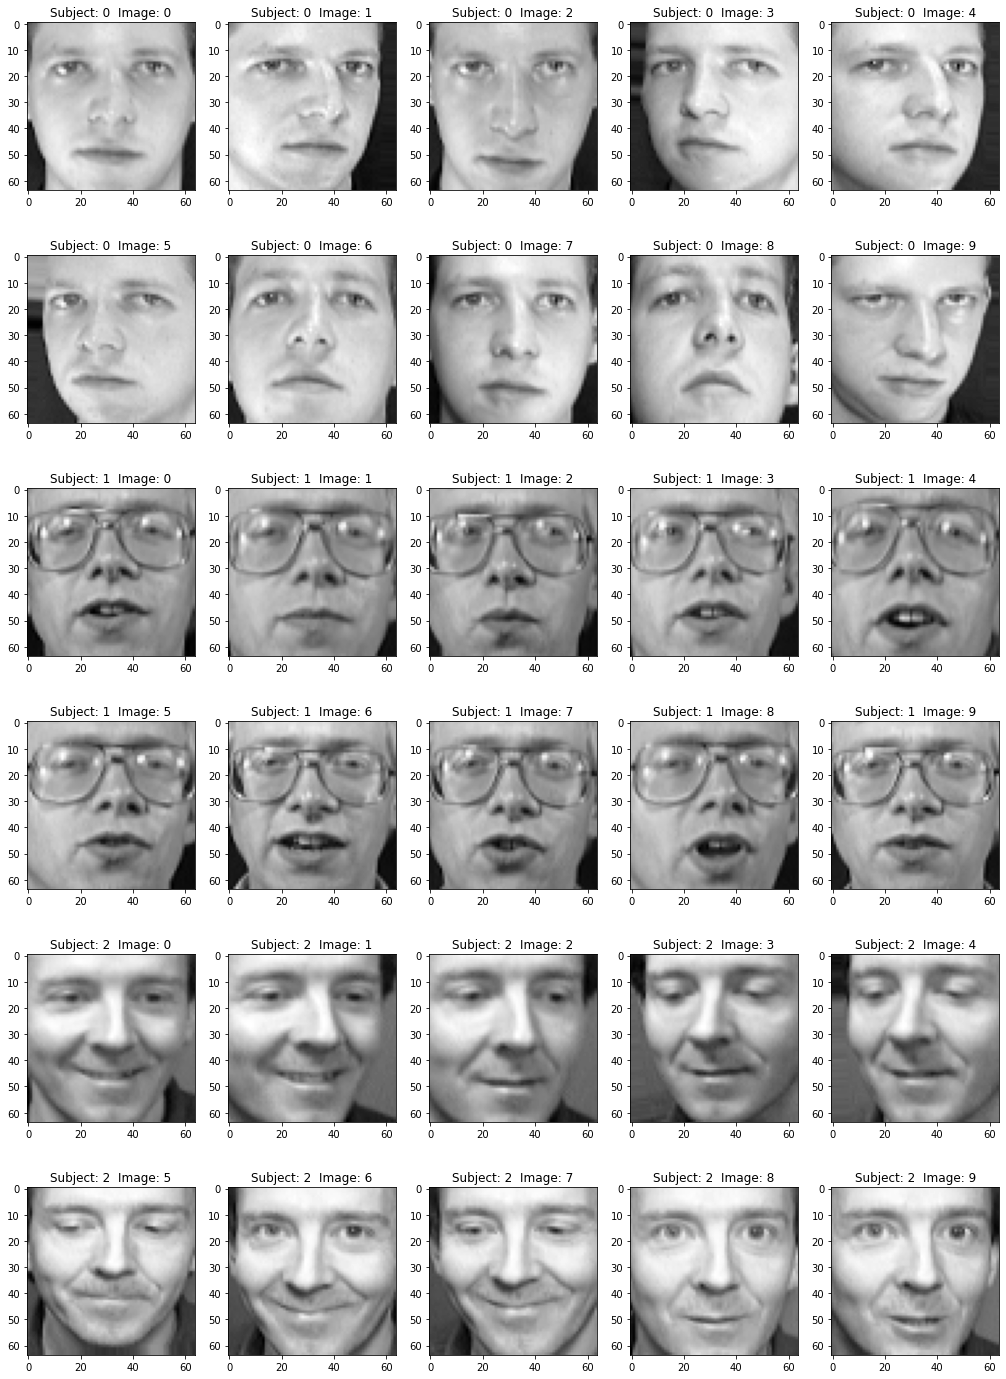

In [10]:
isubject = 0
istart = isubject*10
irow = 6
icol = 5
icount = irow * icol
fig = plt.figure(figsize=(15,25)) #Note: adjust the figsize will also adjust the space between rows of images
                                  #plt.subplots_adjust(top=0, left=0, right = 0, bottom=0) can also be used   
for i in range(icount):
    if i<10:
        title="Subject: " + str((istart+i)//10) + "  Image: " + str(i)
    elif i>9 and i<20:
        title="Subject: " + str((istart+i)//10) + "  Image: " + str(i-10)
    elif i>19:
        title="Subject: " + str((istart+i)//10) + "  Image: " + str(i-20)
    plt.subplot(irow,icol,i+1, title=title)
    plt.subplots_adjust(left=0)
    if istart+i<400:
        plt.imshow(faces.data[istart+i].reshape(64,64), cmap='gray')
    else: break

Before we explore using the data to create a neural network model, we will explore the image data a little. We can brighten or darken the image by scaling the array closer to zero or 1 <br>
First we define an array, then fill the array by the amount we want to shift the brighness of each pixel <br>
We then cap the array to remain within the 0 - 1 boundary

In [12]:
a=np.empty([1,4096])
a.fill(-.6)
X1 = faces.data[0] + a
a=np.empty([1,4096])
a.fill(-.4)
X2 = faces.data[0] + a
a=np.empty([1,4096])
a.fill(.3)
X3 = faces.data[0] + a

X1=np.minimum(X1,1) #sets the maximum value in the array to 1
X1=np.maximum(X1,0) #sets the minimum value in the array to 0
X2=np.minimum(X2,1) #sets the maximum value in the array to 1
X2=np.maximum(X2,0) #sets the minimum value in the array to 0
X3=np.minimum(X3,1) #sets the maximum value in the array to 1
X3=np.maximum(X3,0) #sets the minimum value in the array to 0

print(faces.data[0])
print(X1)
print(X2)
print(X3)

[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
[[0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.01735536 ... 0.         0.         0.        ]]
[[0.60991736 0.66776859 0.71735536 ... 0.45289256 0.46115703 0.4570248 ]]


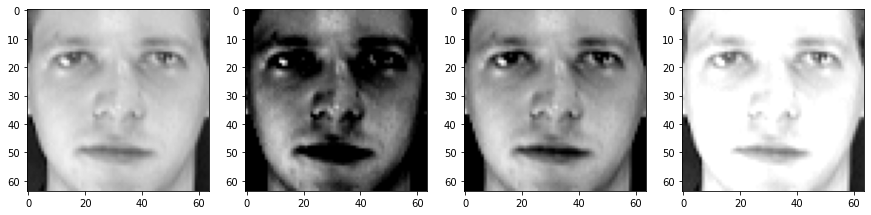

In [13]:
fig = plt.figure(figsize=(15,25))
plt.subplot(1,4,1)
plt.imshow(faces.data[0].reshape(64,64), cmap='gray')
plt.subplot(1,4,2)
plt.imshow(X1.reshape(64,64), cmap='gray')
plt.subplot(1,4,3)
plt.imshow(X2.reshape(64,64), cmap='gray')
plt.subplot(1,4,4)
plt.imshow(X3.reshape(64,64), cmap='gray')

We see how we have shifted the brightness of the image by increasing or decreasing the gray scale color of each pixel.

Moving on to evaluating a neural network.

We will use the first 8 images from each subject to train a neural network and reserve two images from each subject to test the accuracy of the model.

In [14]:
X_train = np.empty((0, 4096)) #Define an empty numpy array
X_test = np.empty((0, 4096))  #Define an empty numpy array
y_train = np.empty((0, 0))    #Define an empty numpy array
y_test = np.empty((0, 0))     #Define an empty numpy array
n_sub_img = 10                #Total number of images per subject
n_sub = 40                    #Total number of subjects
i_train_sub_img = 8           #Number of training images per subject
icount = n_sub_img*40         #Total number of images
i_img = 0
i_sub = 0

for i_sub in range(n_sub):
    for i in range(n_sub_img):
        i_img = i_sub*n_sub_img + i
        #print("i, i_img = ", i, i_img)
        if i<i_train_sub_img:
            X_train = np.append(X_train,faces.data[i_img])
            y_train = np.append(y_train,faces.target[i_img])
        else:
            X_test = np.append(X_test,faces.data[i_img])
            y_test = np.append(y_test,faces.target[i_img])
X_train=X_train.reshape((i_train_sub_img*n_sub),4096)
X_test=X_test.reshape(((n_sub_img-i_train_sub_img)*n_sub),4096)
print("X_train.shape, X_test.shape:  ",X_train.shape, X_test.shape)

X_train.shape, X_test.shape:   (320, 4096) (80, 4096)


Let's check the y_train array to make sure it has the subjects we wanted for training:

In [15]:
y_train

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,  9.,
        9.,  9., 10., 10., 10., 10., 10., 10., 10., 10., 11., 11., 11.,
       11., 11., 11., 11., 11., 12., 12., 12., 12., 12., 12., 12., 12.,
       13., 13., 13., 13., 13., 13., 13., 13., 14., 14., 14., 14., 14.,
       14., 14., 14., 15., 15., 15., 15., 15., 15., 15., 15., 16., 16.,
       16., 16., 16., 16., 16., 16., 17., 17., 17., 17., 17., 17., 17.,
       17., 18., 18., 18., 18., 18., 18., 18., 18., 19., 19., 19., 19.,
       19., 19., 19., 19., 20., 20., 20., 20., 20., 20., 20., 20., 21.,
       21., 21., 21., 21., 21., 21., 21., 22., 22., 22., 22., 22

Let's explore the neural-network multi-layer perceptron classifier (MLPClassifier) built-in to scikit-learn.  We only have 8 images per subject that we're using for training and two images to test the ability of the classifier. We will begin with two hidden layers with 256 and 128 preceptrons, respectively.  We'll test the accuracy and then explore changing the number of preceptrons and hidden layers.

In [16]:
mlp = MLPClassifier(hidden_layer_sizes=(256,128), max_iter=500, activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)

In [17]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 3.74953686
Iteration 2, loss = 3.71432172
Iteration 3, loss = 3.70133154
Iteration 4, loss = 3.69729647
Iteration 5, loss = 3.70434130
Iteration 6, loss = 3.69879422
Iteration 7, loss = 3.69713162
Iteration 8, loss = 3.69258372
Iteration 9, loss = 3.68973187
Iteration 10, loss = 3.68774363
Iteration 11, loss = 3.68703934
Iteration 12, loss = 3.68190607
Iteration 13, loss = 3.68485464
Iteration 14, loss = 3.68119544
Iteration 15, loss = 3.68053546
Iteration 16, loss = 3.67980814
Iteration 17, loss = 3.67766837
Iteration 18, loss = 3.67845402
Iteration 19, loss = 3.67373237
Iteration 20, loss = 3.67510073
Iteration 21, loss = 3.67034673
Iteration 22, loss = 3.67083023
Iteration 23, loss = 3.67078576
Iteration 24, loss = 3.66517444
Iteration 25, loss = 3.66121711
Iteration 26, loss = 3.66186449
Iteration 27, loss = 3.66089094
Iteration 28, loss = 3.65623497
Iteration 29, loss = 3.65429402
Iteration 30, loss = 3.64992698
Iteration 31, loss = 3.64650840
Iteration 32, los

Iteration 253, loss = 0.05772407
Iteration 254, loss = 0.05686939
Iteration 255, loss = 0.05643014
Iteration 256, loss = 0.05553771
Iteration 257, loss = 0.05499673
Iteration 258, loss = 0.05434693
Iteration 259, loss = 0.05404722
Iteration 260, loss = 0.05341443
Iteration 261, loss = 0.05305156
Iteration 262, loss = 0.05239116
Iteration 263, loss = 0.05182543
Iteration 264, loss = 0.05122376
Iteration 265, loss = 0.05077667
Iteration 266, loss = 0.05035742
Iteration 267, loss = 0.04974921
Iteration 268, loss = 0.04930775
Iteration 269, loss = 0.04863322
Iteration 270, loss = 0.04818683
Iteration 271, loss = 0.04783533
Iteration 272, loss = 0.04739002
Iteration 273, loss = 0.04685863
Iteration 274, loss = 0.04635668
Iteration 275, loss = 0.04604344
Iteration 276, loss = 0.04563334
Iteration 277, loss = 0.04511675
Iteration 278, loss = 0.04478463
Iteration 279, loss = 0.04447504
Iteration 280, loss = 0.04398942
Iteration 281, loss = 0.04363958
Iteration 282, loss = 0.04313764
Iteration 

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(256, 128), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

We see that a neural network with two hidden layers (245, 128 preceptrons per layer) converged after 466 iterations.  Now let's test the accuracy of the model.

In [18]:
y_pred = mlp.predict(X_test)

We'll print the predicted values and the true test values then calculate the accuracy

In [19]:
y_pred

array([ 0., 11.,  1.,  1., 22., 22.,  3.,  3.,  4.,  5.,  5.,  5.,  6.,
        6., 28.,  7.,  8.,  8., 39.,  7., 10., 10., 11., 11., 12., 12.,
       13., 13., 14., 14., 15., 15., 16., 16., 17., 17., 18., 18., 19.,
       19., 20., 20., 21., 21., 22., 22., 23., 23., 24., 24., 25., 25.,
       26., 26., 27., 27., 19., 28., 29., 29., 30., 30., 31., 31., 32.,
       32., 33., 33., 34., 34., 15., 35., 36., 36., 37., 37., 38., 38.,
        0., 39.])

In [20]:
y_test

array([ 0.,  0.,  1.,  1.,  2.,  2.,  3.,  3.,  4.,  4.,  5.,  5.,  6.,
        6.,  7.,  7.,  8.,  8.,  9.,  9., 10., 10., 11., 11., 12., 12.,
       13., 13., 14., 14., 15., 15., 16., 16., 17., 17., 18., 18., 19.,
       19., 20., 20., 21., 21., 22., 22., 23., 23., 24., 24., 25., 25.,
       26., 26., 27., 27., 28., 28., 29., 29., 30., 30., 31., 31., 32.,
       32., 33., 33., 34., 34., 35., 35., 36., 36., 37., 37., 38., 38.,
       39., 39.])

In [22]:
import sys
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [23]:
accuracy_score(y_test, y_pred)

0.875

Let's review the confusion matrix:

In [24]:
np.set_printoptions(threshold=sys.maxsize)
cm = confusion_matrix(y_pred, y_test)
print(cm)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

We see mostly agreement, and an accuracy of our model is not bad given we had so few images per subject.  Although this is probably a good score for a tough calculus class, I'd like to see if we can improve this model.

We will decrease the number of preceptrons in the hidden layer of the neural-network to see how that will change the accuracy of the model:

In [25]:
mlp = MLPClassifier(hidden_layer_sizes=(256,32), max_iter=600, activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)

In [26]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 3.72223575
Iteration 2, loss = 3.71652000
Iteration 3, loss = 3.70470047
Iteration 4, loss = 3.69673952
Iteration 5, loss = 3.69085082
Iteration 6, loss = 3.68913389
Iteration 7, loss = 3.68742371
Iteration 8, loss = 3.68739744
Iteration 9, loss = 3.68628951
Iteration 10, loss = 3.68591343
Iteration 11, loss = 3.68512584
Iteration 12, loss = 3.68371130
Iteration 13, loss = 3.68260260
Iteration 14, loss = 3.68053099
Iteration 15, loss = 3.67933032
Iteration 16, loss = 3.67865751
Iteration 17, loss = 3.67610275
Iteration 18, loss = 3.67498931
Iteration 19, loss = 3.67463716
Iteration 20, loss = 3.67261577
Iteration 21, loss = 3.67127476
Iteration 22, loss = 3.66991475
Iteration 23, loss = 3.66820979
Iteration 24, loss = 3.66732976
Iteration 25, loss = 3.66570327
Iteration 26, loss = 3.66394099
Iteration 27, loss = 3.66180999
Iteration 28, loss = 3.65990806
Iteration 29, loss = 3.65708279
Iteration 30, loss = 3.65570325
Iteration 31, loss = 3.65284643
Iteration 32, los

Iteration 253, loss = 0.21662278
Iteration 254, loss = 0.21410703
Iteration 255, loss = 0.21024700
Iteration 256, loss = 0.20803964
Iteration 257, loss = 0.20585188
Iteration 258, loss = 0.20164093
Iteration 259, loss = 0.19924698
Iteration 260, loss = 0.19692650
Iteration 261, loss = 0.19520412
Iteration 262, loss = 0.19405643
Iteration 263, loss = 0.19222246
Iteration 264, loss = 0.18790271
Iteration 265, loss = 0.18481415
Iteration 266, loss = 0.18619528
Iteration 267, loss = 0.18458769
Iteration 268, loss = 0.17826876
Iteration 269, loss = 0.17758844
Iteration 270, loss = 0.17720421
Iteration 271, loss = 0.17178107
Iteration 272, loss = 0.16976227
Iteration 273, loss = 0.16786172
Iteration 274, loss = 0.16702854
Iteration 275, loss = 0.16607674
Iteration 276, loss = 0.16328295
Iteration 277, loss = 0.16134735
Iteration 278, loss = 0.15841426
Iteration 279, loss = 0.15751507
Iteration 280, loss = 0.15507545
Iteration 281, loss = 0.15515151
Iteration 282, loss = 0.15285619
Iteration 

Iteration 503, loss = 0.03712286
Iteration 504, loss = 0.03694649
Iteration 505, loss = 0.03684150
Iteration 506, loss = 0.03667532
Iteration 507, loss = 0.03657249
Iteration 508, loss = 0.03642967
Iteration 509, loss = 0.03630796
Iteration 510, loss = 0.03618918
Iteration 511, loss = 0.03607599
Iteration 512, loss = 0.03588912
Iteration 513, loss = 0.03577581
Iteration 514, loss = 0.03565329
Iteration 515, loss = 0.03554307
Iteration 516, loss = 0.03537636
Iteration 517, loss = 0.03525253
Iteration 518, loss = 0.03511558
Iteration 519, loss = 0.03498367
Iteration 520, loss = 0.03486150
Iteration 521, loss = 0.03481669
Iteration 522, loss = 0.03465140
Iteration 523, loss = 0.03449690
Iteration 524, loss = 0.03439974
Iteration 525, loss = 0.03426095
Iteration 526, loss = 0.03417888
Iteration 527, loss = 0.03402528
Iteration 528, loss = 0.03390344
Iteration 529, loss = 0.03378804
Iteration 530, loss = 0.03367162
Iteration 531, loss = 0.03359367
Iteration 532, loss = 0.03345911
Iteration 

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(256, 32), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=600, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

We have reached convergence with the new model so we will once again test the accuracy. 

In [27]:
y_pred = mlp.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.9

We increased the accuracy using fewer preceptrons in the second hidden layer

In [29]:
print("y_test: ", y_test)
print("y_pred: ", y_pred)

y_test:  [ 0.  0.  1.  1.  2.  2.  3.  3.  4.  4.  5.  5.  6.  6.  7.  7.  8.  8.
  9.  9. 10. 10. 11. 11. 12. 12. 13. 13. 14. 14. 15. 15. 16. 16. 17. 17.
 18. 18. 19. 19. 20. 20. 21. 21. 22. 22. 23. 23. 24. 24. 25. 25. 26. 26.
 27. 27. 28. 28. 29. 29. 30. 30. 31. 31. 32. 32. 33. 33. 34. 34. 35. 35.
 36. 36. 37. 37. 38. 38. 39. 39.]
y_pred:  [ 0. 11.  1.  1. 11.  2.  3.  3.  4. 35.  5.  5.  6.  6.  0.  7.  8.  8.
 11.  7. 10. 10. 11. 11. 12. 12. 13. 13. 14. 29. 15. 15. 16. 16. 17. 17.
 18. 18. 19. 19. 20. 20. 21. 21. 22. 22. 23. 23. 24. 24. 25. 25. 26. 26.
 27. 27. 28. 28. 29. 29. 30. 30. 31. 31. 32. 32. 33. 33. 34. 34. 15. 35.
 36. 36. 37. 37. 38. 38. 39. 39.]


We will increase the number of layers in the neural-network to see if that will improve the accuracy of the system.

In [30]:
mlp = MLPClassifier(hidden_layer_sizes=(256,64,32), max_iter=600, activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)

In [31]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 3.74556316
Iteration 2, loss = 3.73035393
Iteration 3, loss = 3.71766483
Iteration 4, loss = 3.70339816
Iteration 5, loss = 3.69693929
Iteration 6, loss = 3.69301885
Iteration 7, loss = 3.69273513
Iteration 8, loss = 3.69263230
Iteration 9, loss = 3.69397158
Iteration 10, loss = 3.69523393
Iteration 11, loss = 3.69539321
Iteration 12, loss = 3.69472730
Iteration 13, loss = 3.69460517
Iteration 14, loss = 3.69311217
Iteration 15, loss = 3.69238638
Iteration 16, loss = 3.69174728
Iteration 17, loss = 3.69137661
Iteration 18, loss = 3.69075751
Iteration 19, loss = 3.69107291
Iteration 20, loss = 3.69217865
Iteration 21, loss = 3.69128229
Iteration 22, loss = 3.69141363
Iteration 23, loss = 3.69136063
Iteration 24, loss = 3.69088131
Iteration 25, loss = 3.69138459
Iteration 26, loss = 3.69120014
Iteration 27, loss = 3.69113000
Iteration 28, loss = 3.69077077
Iteration 29, loss = 3.69116433
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. S

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(256, 64, 32), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=600, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

The model convered in only 29 steps, now let's see how accurate it is.

In [32]:
y_pred = mlp.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.025

Our accuracey was 90% using two layers (256, 32 preceptrons), using three layers (256, 64, 32 preceptrons) results in a model with only 2.5% accuracy.  Let's review the predicted and actual output.  

In [34]:
print("y_test: ", y_test)
print("y_pred: ", y_pred)

y_test:  [ 0.  0.  1.  1.  2.  2.  3.  3.  4.  4.  5.  5.  6.  6.  7.  7.  8.  8.
  9.  9. 10. 10. 11. 11. 12. 12. 13. 13. 14. 14. 15. 15. 16. 16. 17. 17.
 18. 18. 19. 19. 20. 20. 21. 21. 22. 22. 23. 23. 24. 24. 25. 25. 26. 26.
 27. 27. 28. 28. 29. 29. 30. 30. 31. 31. 32. 32. 33. 33. 34. 34. 35. 35.
 36. 36. 37. 37. 38. 38. 39. 39.]
y_pred:  [17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17.
 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17.
 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17.
 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17.
 17. 17. 17. 17. 17. 17. 17. 17.]


We see that adding layers does not necessarily improve the model.  There is too little data to train the model with that many layers. The model went from 90% accurate to 2.5% accurate.

We will go back to a two layer model and adjust the number of preceptrons in the two hidden layers to see how that changes the accuracy of the model.

In [35]:
mlp = MLPClassifier(hidden_layer_sizes=(128,32), max_iter=600, activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)

In [36]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 3.71819629
Iteration 2, loss = 3.71080794
Iteration 3, loss = 3.70322418
Iteration 4, loss = 3.69661577
Iteration 5, loss = 3.69264383
Iteration 6, loss = 3.68902794
Iteration 7, loss = 3.68895929
Iteration 8, loss = 3.68834304
Iteration 9, loss = 3.68816686
Iteration 10, loss = 3.68753294
Iteration 11, loss = 3.68689081
Iteration 12, loss = 3.68488148
Iteration 13, loss = 3.68384938
Iteration 14, loss = 3.68305327
Iteration 15, loss = 3.68250310
Iteration 16, loss = 3.68120635
Iteration 17, loss = 3.68029824
Iteration 18, loss = 3.67817828
Iteration 19, loss = 3.67784029
Iteration 20, loss = 3.67725947
Iteration 21, loss = 3.67609338
Iteration 22, loss = 3.67489238
Iteration 23, loss = 3.67393930
Iteration 24, loss = 3.67226546
Iteration 25, loss = 3.67144130
Iteration 26, loss = 3.67051766
Iteration 27, loss = 3.66970326
Iteration 28, loss = 3.66789060
Iteration 29, loss = 3.66724574
Iteration 30, loss = 3.66435152
Iteration 31, loss = 3.66481710
Iteration 32, los

Iteration 254, loss = 0.19524025
Iteration 255, loss = 0.19494713
Iteration 256, loss = 0.19725509
Iteration 257, loss = 0.18773925
Iteration 258, loss = 0.18627725
Iteration 259, loss = 0.18903909
Iteration 260, loss = 0.18040368
Iteration 261, loss = 0.17962510
Iteration 262, loss = 0.17671235
Iteration 263, loss = 0.17573491
Iteration 264, loss = 0.17388614
Iteration 265, loss = 0.17001872
Iteration 266, loss = 0.16766183
Iteration 267, loss = 0.16609718
Iteration 268, loss = 0.16316214
Iteration 269, loss = 0.16220347
Iteration 270, loss = 0.16080810
Iteration 271, loss = 0.15845782
Iteration 272, loss = 0.15598704
Iteration 273, loss = 0.15421233
Iteration 274, loss = 0.15196791
Iteration 275, loss = 0.15012172
Iteration 276, loss = 0.14780812
Iteration 277, loss = 0.14653104
Iteration 278, loss = 0.14592878
Iteration 279, loss = 0.14547536
Iteration 280, loss = 0.14132638
Iteration 281, loss = 0.13998391
Iteration 282, loss = 0.13849614
Iteration 283, loss = 0.13744856
Iteration 

Iteration 504, loss = 0.03487266
Iteration 505, loss = 0.03476987
Iteration 506, loss = 0.03465762
Iteration 507, loss = 0.03447540
Iteration 508, loss = 0.03436184
Iteration 509, loss = 0.03421846
Iteration 510, loss = 0.03411441
Iteration 511, loss = 0.03401418
Iteration 512, loss = 0.03385573
Iteration 513, loss = 0.03379747
Iteration 514, loss = 0.03365386
Iteration 515, loss = 0.03350386
Iteration 516, loss = 0.03338370
Iteration 517, loss = 0.03330349
Iteration 518, loss = 0.03313535
Iteration 519, loss = 0.03305098
Iteration 520, loss = 0.03294631
Iteration 521, loss = 0.03282877
Iteration 522, loss = 0.03272558
Iteration 523, loss = 0.03261691
Iteration 524, loss = 0.03248632
Iteration 525, loss = 0.03239233
Iteration 526, loss = 0.03226355
Iteration 527, loss = 0.03217998
Iteration 528, loss = 0.03206904
Iteration 529, loss = 0.03193313
Iteration 530, loss = 0.03182739
Iteration 531, loss = 0.03172915
Iteration 532, loss = 0.03161823
Iteration 533, loss = 0.03150686
Iteration 

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(128, 32), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=600, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

We see the model once again converged.  We will now test the accuracy again.

In [37]:
y_pred = mlp.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)

0.8625

In [39]:
print("y_test: ", y_test)
print("y_pred: ", y_pred)

y_test:  [ 0.  0.  1.  1.  2.  2.  3.  3.  4.  4.  5.  5.  6.  6.  7.  7.  8.  8.
  9.  9. 10. 10. 11. 11. 12. 12. 13. 13. 14. 14. 15. 15. 16. 16. 17. 17.
 18. 18. 19. 19. 20. 20. 21. 21. 22. 22. 23. 23. 24. 24. 25. 25. 26. 26.
 27. 27. 28. 28. 29. 29. 30. 30. 31. 31. 32. 32. 33. 33. 34. 34. 35. 35.
 36. 36. 37. 37. 38. 38. 39. 39.]
y_pred:  [ 0. 11.  1.  1. 11. 11.  3.  3.  4.  5.  5.  5.  6.  6.  0.  7.  8.  8.
 11.  0. 10. 10. 11. 11. 12. 12. 13. 13. 14. 14. 15. 15. 16. 16. 17. 17.
 18. 18. 19. 19. 20. 20. 21. 21. 22. 22. 23. 23. 24. 24. 25. 24. 26. 26.
 27. 27. 19. 28. 29. 29. 30. 30. 31. 31. 32. 32. 33. 33. 34. 34. 15. 35.
 36. 36. 37. 37. 38. 38.  0. 39.]


We see that the model using (128, 32 preceptrons) has an accuracy of 86.25%.  This is not as good as it was with (256, 32) preceptrons.

We will adjust the number of preceptrons in the hidden layers to see how that changes the accuracy of the model.

In [40]:
mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=600, activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)

In [41]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 3.76342246
Iteration 2, loss = 3.69309287
Iteration 3, loss = 3.67834476
Iteration 4, loss = 3.66657630
Iteration 5, loss = 3.63911283
Iteration 6, loss = 3.61118722
Iteration 7, loss = 3.57969980
Iteration 8, loss = 3.54417957
Iteration 9, loss = 3.50922287
Iteration 10, loss = 3.47107242
Iteration 11, loss = 3.42856225
Iteration 12, loss = 3.37141654
Iteration 13, loss = 3.32020820
Iteration 14, loss = 3.25428027
Iteration 15, loss = 3.18503301
Iteration 16, loss = 3.10764899
Iteration 17, loss = 3.02352620
Iteration 18, loss = 2.93117992
Iteration 19, loss = 2.84119113
Iteration 20, loss = 2.74579898
Iteration 21, loss = 2.63861329
Iteration 22, loss = 2.55075523
Iteration 23, loss = 2.44229434
Iteration 24, loss = 2.32500811
Iteration 25, loss = 2.22255504
Iteration 26, loss = 2.12878429
Iteration 27, loss = 2.01846797
Iteration 28, loss = 1.90573478
Iteration 29, loss = 1.79767829
Iteration 30, loss = 1.71645957
Iteration 31, loss = 1.61034631
Iteration 32, los

Iteration 253, loss = 0.01918541
Iteration 254, loss = 0.01910160
Iteration 255, loss = 0.01896852
Iteration 256, loss = 0.01888024
Iteration 257, loss = 0.01879487
Iteration 258, loss = 0.01870520
Iteration 259, loss = 0.01858400
Iteration 260, loss = 0.01851093
Iteration 261, loss = 0.01847461
Iteration 262, loss = 0.01832582
Iteration 263, loss = 0.01822143
Iteration 264, loss = 0.01813941
Iteration 265, loss = 0.01803482
Iteration 266, loss = 0.01792334
Iteration 267, loss = 0.01786130
Iteration 268, loss = 0.01778395
Iteration 269, loss = 0.01766927
Iteration 270, loss = 0.01759047
Iteration 271, loss = 0.01748684
Iteration 272, loss = 0.01742065
Iteration 273, loss = 0.01733731
Iteration 274, loss = 0.01724068
Iteration 275, loss = 0.01714503
Iteration 276, loss = 0.01706368
Iteration 277, loss = 0.01698618
Iteration 278, loss = 0.01692690
Iteration 279, loss = 0.01685206
Iteration 280, loss = 0.01676010
Iteration 281, loss = 0.01668101
Iteration 282, loss = 0.01658746
Training l

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(128,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=600, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

Let's check the accuracy of this new model (128 preceptrons in one hidden layer)

In [42]:
y_pred = mlp.predict(X_test)

In [43]:
accuracy_score(y_test, y_pred)

0.9375

In [44]:
print("y_test: ", y_test)
print("y_pred: ", y_pred)

y_test:  [ 0.  0.  1.  1.  2.  2.  3.  3.  4.  4.  5.  5.  6.  6.  7.  7.  8.  8.
  9.  9. 10. 10. 11. 11. 12. 12. 13. 13. 14. 14. 15. 15. 16. 16. 17. 17.
 18. 18. 19. 19. 20. 20. 21. 21. 22. 22. 23. 23. 24. 24. 25. 25. 26. 26.
 27. 27. 28. 28. 29. 29. 30. 30. 31. 31. 32. 32. 33. 33. 34. 34. 35. 35.
 36. 36. 37. 37. 38. 38. 39. 39.]
y_pred:  [ 0.  0.  1.  1.  9.  2.  3.  3.  4.  5.  5.  5.  6.  6. 28.  7.  8.  8.
 39.  7. 10. 10. 11. 11. 12. 12. 13. 13. 14. 14. 15. 15. 16. 16. 17. 17.
 18. 18. 19. 19. 20. 20. 21. 21. 22. 22. 23. 23. 24. 24. 25. 25. 26. 26.
 27. 27. 28. 28. 29. 29. 30. 30. 31. 31. 32. 32. 33. 33. 34. 34. 35. 35.
 36. 36. 37. 37. 38. 38. 39. 39.]


We see that the accuracy of the model improved by removing the second hidden layer.

Let's see what images created the problems:
In our model: <br>
subject 2 was mistaken for subject 9 <br>
subject 7 was mistaken for subject 28 <br>
subject 9 was mistaken for subject 7 <br>
subject 9 was also  mistaken for subject 39 <br>
We will examine each of the figures to see what the issue is:

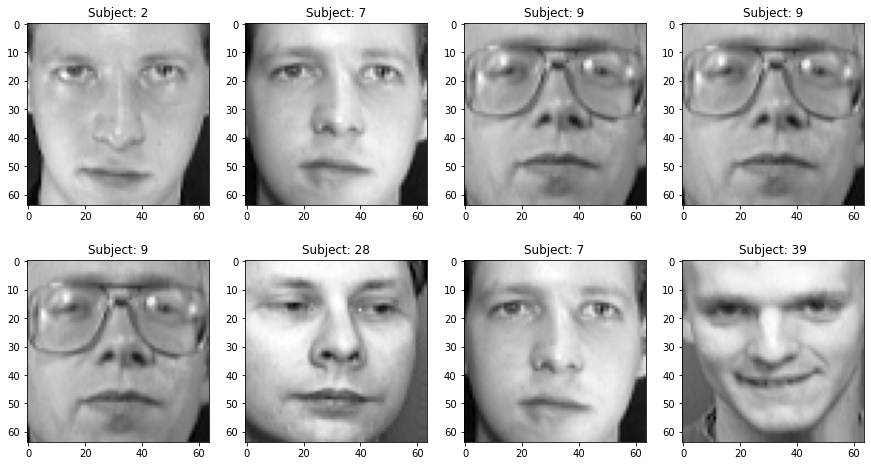

In [52]:
fig = plt.figure(figsize=(15,8))
plt.subplot(2,4,1, title = "Subject: 2")
plt.imshow(X_train[2].reshape(64,64), cmap='gray')
plt.subplot(2,4,2, title = "Subject: 7")
plt.imshow(X_train[7].reshape(64,64), cmap='gray')
plt.subplot(2,4,3, title = "Subject: 9")
plt.imshow(X_train[9].reshape(64,64), cmap='gray')
plt.subplot(2,4,4, title = "Subject: 9")
plt.imshow(X_train[9].reshape(64,64), cmap='gray')
plt.subplot(2,4,5, title = "Subject: 9")
plt.imshow(X_train[9].reshape(64,64), cmap='gray')
plt.subplot(2,4,6, title = "Subject: 28")
plt.imshow(X_train[28].reshape(64,64), cmap='gray')
plt.subplot(2,4,7, title = "Subject: 7")
plt.imshow(X_train[7].reshape(64,64), cmap='gray')
plt.subplot(2,4,8, title = "Subject: 39")
plt.imshow(X_train[39].reshape(64,64), cmap='gray')

It's likely that the presence of the glasses was at least one contributing factor to the confusion